In [205]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

def laplace_mech(v, sensitivity, epsilon):
    return v + np.random.laplace(loc=0, scale=sensitivity / epsilon)

def gaussian_mech(v, sensitivity, epsilon, delta):
    return v + np.random.normal(loc=0, scale=sensitivity * np.sqrt(2*np.log(1.25/delta)) / epsilon)

def pct_error(orig, priv):
    return np.abs(orig - priv)/orig * 100.0

compas = pd.read_csv('https://github.com/twiemold/CS211_Thomas_Wiemold_Final_Project/raw/main/compas-scores-two-years.csv')

idxs_to_drop = []
for i in range(len(compas)):
        if compas['is_recid'][i] == -1:
            idxs_to_drop.append(i)
        elif compas['c_charge_degree'][i] == "O":
            idxs_to_drop.append(i)
        elif compas['score_text'][i] == 'N/A':
            idxs_to_drop.append(i)
        elif compas['v_score_text'][i] == 'N/A':
            idxs_to_drop.append(i)
        elif compas['days_b_screening_arrest'][i]  >= 30:
            idxs_to_drop.append(i)
        elif compas['days_b_screening_arrest'][i]  <= -30:
            idxs_to_drop.append(i)
        else:
            i += 1
for i in range(len(idxs_to_drop)):
    compas.drop(
        labels = [idxs_to_drop[i]],
        axis = 0,
        inplace = True
    )
            
            
            
            
            
            
            

In [206]:
compas

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7209,10996,steven butler,steven,butler,2013-11-23,Male,1992-07-17,23,Less than 25,African-American,...,5,Medium,2013-11-23,2013-11-22,2013-11-24,0,1,860,0,0
7210,10997,malcolm simmons,malcolm,simmons,2014-02-01,Male,1993-03-25,23,Less than 25,African-American,...,5,Medium,2014-02-01,2014-01-31,2014-02-02,0,1,790,0,0
7211,10999,winston gregory,winston,gregory,2014-01-14,Male,1958-10-01,57,Greater than 45,Other,...,1,Low,2014-01-14,2014-01-13,2014-01-14,0,0,808,0,0
7212,11000,farrah jean,farrah,jean,2014-03-09,Female,1982-11-17,33,25 - 45,African-American,...,2,Low,2014-03-09,2014-03-08,2014-03-09,3,0,754,0,0


In [207]:
def two_year_recid_count(epsilon):
    count = len(compas[compas['two_year_recid'] == 1])
    return laplace_mech(count, 1, epsilon)

two_year_recid_count(1.0)

2857.2773455707074

In [222]:
true_val = len(compas[compas['two_year_recid'] == 1])
trials = [two_year_recid_count(1.0) for c in range(20)]
errors = [pct_error(true_val, t) for t in trials]
print('Median error:', np.median(errors))
assert np.median(errors) > 0
assert np.median(errors) < 100

Median error: 0.013856759235289248


In [209]:
def sex_percentages(epsilon):
    male_count = len(compas[compas['sex'] == 'Male'])
    female_count = len(compas[compas['sex'] == 'Female'])
    total_count = len(compas)
    dp_male_count = laplace_mech(male_count, 1, epsilon/3)
    dp_female_count = laplace_mech(female_count, 1, epsilon/3)
    dp_total = laplace_mech(total_count, 1, epsilon/3)
    male_percent = (dp_male_count / dp_total) * 100
    female_percent = (dp_female_count / dp_total) * 100
    return male_percent, female_percent
    

sex_percentages(1.0)

(80.85546550098668, 19.011656939978508)

In [210]:
true_total = len(compas)
true_val_male = (len(compas[compas['sex'] == 'Male']) / true_total) * 100
true_val_female = (len(compas[compas['sex'] == 'Female']) / true_total) * 100
trials = [sex_percentages(1.0) for c in range(20)]
male_trial_data = [trials[i][0] for i in range(20)]
female_trial_data = [trials[i][1] for i in range(20)]
male_errors = [pct_error(true_val_male, t) for t in male_trial_data]
female_errors = [pct_error(true_val_female, t) for t in female_trial_data]
print('Median Male error:', np.median(male_errors))
print('Median Female error:', np.median(female_errors))
assert np.median(male_errors) > 0
assert np.median(male_errors) < 100
assert np.median(female_errors) > 0
assert np.median(female_errors) < 100

Median Male error: 0.09392076772213728
Median Female error: 0.21060077946933586


In [211]:
def dp_crosstab_sex_race(epsilon):
    return pd.crosstab(compas['race'], compas['sex']).applymap(lambda x: laplace_mech(x, 1, epsilon))

dp_crosstab_sex_race(1.0)

sex,Female,Male
race,,
African-American,578.538427,2748.966606
Asian,2.881675,27.255008
Caucasian,499.208519,1671.470970
Hispanic,89.403265,472.414558
Native American,3.109899,10.415696
Other,65.024144,297.511290


In [223]:
ct = dp_crosstab_sex_race(1.0)
true_ct = pd.crosstab(compas['race'], compas['sex'])
assert abs(ct['Female']['African-American'] - true_ct['Female']['African-American']) < 100
assert abs(ct['Male']['African-American'] - true_ct['Male']['African-American']) < 100
assert abs(ct['Male']['Caucasian'] - true_ct['Male']['Caucasian']) < 100

In [213]:
def dp_crosstab_decile_race(epsilon):
    return pd.crosstab(compas['race'], compas['decile_score']).applymap(lambda x: laplace_mech(x, 1, epsilon))

dp_crosstab_decile_race(1.0)

decile_score,1,2,3,4,5,6,7,8,9,10
race,,,,,,,,,,
African-American,381.157079,363.414179,314.883349,348.177704,338.122673,335.621268,359.143879,314.531200,336.287651,242.419907
Asian,14.982112,2.242417,6.456641,2.599143,1.989753,3.291970,0.785722,2.655489,-1.556108,1.092289
Caucasian,629.152544,327.564962,247.705053,251.964715,205.832290,166.347841,116.300101,99.016524,78.472723,50.015751
Hispanic,178.252784,101.014505,78.471398,47.561487,42.083751,30.435588,28.277485,19.117699,15.923654,17.727186
Native American,2.116829,2.928366,0.884743,-2.219402,-0.674582,4.668312,3.362903,0.282901,-3.029936,3.036641
Other,146.922414,62.823826,35.816475,37.923842,19.777406,20.671356,10.076611,12.357497,10.270380,7.318909


In [224]:
ct = dp_crosstab_decile_race(1.0)
true_ct = pd.crosstab(compas['race'], compas['decile_score'])
assert abs(ct[5]['African-American'] - true_ct[5]['African-American']) < 100
assert abs(ct[1]['Caucasian'] - true_ct[1]['Caucasian']) < 100
assert abs(ct[1]['Other'] - true_ct[1]['Other']) < 100

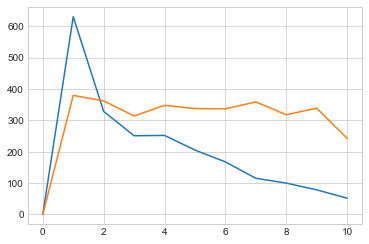

In [215]:
def score_race_hist(epsilon, race):
    # uses parallel composition, histogram
    counts = [len(compas[(compas['decile_score'] == i) & (compas['race'] == race)]) for i in range(0,11)]
    noisy_counts = [laplace_mech(c, 1, epsilon) for c in counts]
    return noisy_counts

plt.plot(score_race_hist(1.0, 'Caucasian'));
plt.plot(score_race_hist(1.0, 'African-American'));

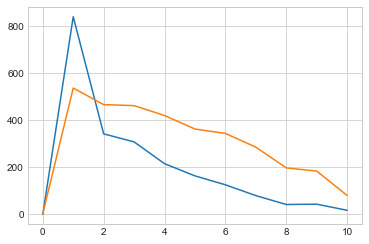

In [125]:
def score_race_violent_hist(epsilon, race):
    # uses parallel composition, histogram
    counts = [len(compas[(compas['v_decile_score'] == i) & (compas['race'] == race)]) for i in range(0,11)]
    noisy_counts = [laplace_mech(c, 1, epsilon) for c in counts]
    return noisy_counts

plt.plot(score_race_violent_hist(1.0, 'Caucasian'));
plt.plot(score_race_violent_hist(1.0, 'African-American'));